In [29]:
import os
import json
import numpy as np
import xarray as xr
import proplot as pplt
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.basemap import Basemap
from matplotlib.ticker import FuncFormatter
from matplotlib.collections import PolyCollection

In [30]:
# %config InlineBackend.figure_format = 'retina'
# plt.rcParams['font.family'] = 'Arial'
# plt.rcParams['font.size'] = 9

In [9]:
with open('/global/cfs/cdirs/m4334/sferrett/monsoon-kernels/scripts/configs.json','r',encoding='utf-8') as f:
    CONFIGS = json.load(f)
SPLITSDIR  = CONFIGS['filepaths']['splits']
MODELS     = CONFIGS['models']
FIELDVARS  = CONFIGS['variables']['field']
LOCALVARS  = CONFIGS['variables']['local']
TARGETVAR  = CONFIGS['variables']['target']
LATRANGE   = CONFIGS['domain']['latrange']
LONRANGE   = CONFIGS['domain']['lonrange']
LEVRANGE   = CONFIGS['domain']['levrange']
SPLIT      = 'valid'

In [8]:
ds = xr.open_dataset(f'{SPLITSDIR}/{SPLIT}.h5',engine='h5netcdf').isel(time=0)

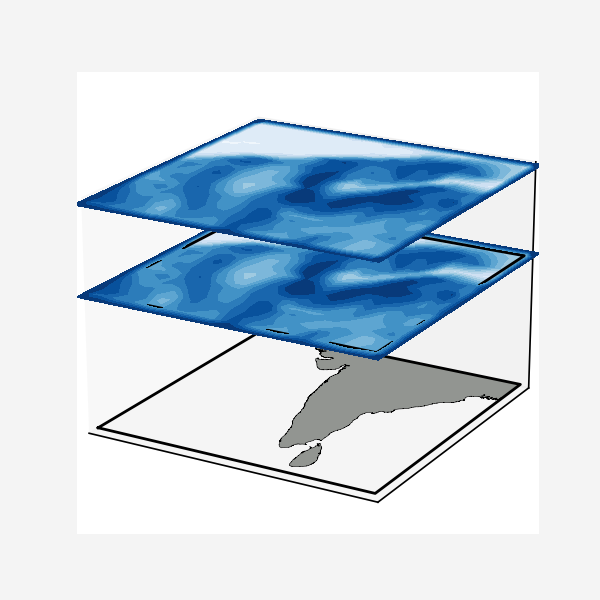

In [102]:
varname  = 'rh'
plotlevs = [700,500] 
lon,lat  = np.meshgrid(ds.lon.values,ds.lat.values)

fig,ax = plt.subplots(1,1,figsize=(3,3),subplot_kw={'projection':'3d'})

m = Basemap(llcrnrlon=LONRANGE[0],urcrnrlon=LONRANGE[1],llcrnrlat=LATRANGE[0],urcrnrlat=LATRANGE[1],
            projection='cyl',resolution='i',fix_aspect=False,ax=ax)

polys = [list(p.get_coords()[:,:2])+[p.get_coords()[0,:2]]for p in m.landpolygons]
land  = PolyCollection(polys,edgecolor='k',facecolor='gray',linewidths=0.2,closed=False)

ax.add_collection3d(land,zs=LEVRANGE[1])
ax.set_proj_type('persp')
ax.set_box_aspect(None,zoom=1.1)
ax.view_init(azim=-60,elev=20)
ax.grid(False)
ax.set_xlim(LONRANGE[0],LONRANGE[1])
ax.set_ylim(LATRANGE[0],LATRANGE[1])
ax.set_zlim(LEVRANGE[1],LEVRANGE[0])
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.tick_params(axis='z',which='major',pad=4)

def add_layer_frame(ax, lonrange, latrange, z,color='k',linewidth=1.0):
    lon0, lon1 = lonrange
    lat0, lat1 = latrange
    xs = [lon0, lon1, lon1, lon0, lon0]
    ys = [lat0, lat0, lat1, lat1, lat0]
    zs = [z]*5
    ax.plot(xs, ys, zs, color=color, linewidth=linewidth,zorder=10)

for lev in plotlevs:
    da     = ds[varname].sel(lev=lev)
    values = da.values
    ax.contourf(lon,lat,data,zdir='z',offset=lev,levels=10,cmap='Blues')
    add_layer_frame(ax,LONRANGE,LATRANGE,lev)
    ax.set_zorder(10)

add_layer_frame(ax,LONRANGE,LATRANGE,LEVRANGE[1])


# for lev in plotlevs:
#     data = ds[varname].sel(lev=lev).values
#     ax.contourf(lon,lat,data,zdir='z',offset=float(ds[varname].sel(lev=lev)['lev'].values),levels=10,cmap='Blues')

plt.show()